## Finding why people churn 

## Goals:

Discover the reason why people are churning, I am looking for the reason why.  


## Imports

In [29]:
import pandas as pd
import numpy as np
from scipy import stats


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



## Acquire

- made my own funcation to call the data easily 
- Data acquired from codeup sql sever(could also find it on Kaggle)
- data shape is 7043, 24
- I was looking for why people are Churning(people leavin the service)



In [30]:
#own function I made to call the right table
import acquire as a 
df= a.get_telco_data()

## Prepare

- How i prepared the data is by removeing all null values 
- got rid of the blank by changing them to 0
- dropping 3 colums that only has an id and does not provide much help beside using them to join table in mysql
- encoded categorical variables
- Splitthe dataset by train, val, test


In [31]:
#function use to clean up the datset
import prepare as p 
df = p.prep_telco(df)

# I am splitting the data so we can start to test on it
train, val, test= p.splitting_data(df,'churn')

#this function encode the dataset changing all the dataset to int type 
train_encoded, val_encoded, test_encoded = p.preprocess_telco(train, val, test)

## Explore 

In [32]:
#show the data info and what we are working with after clean it up using the df not the train dataset 
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 2865 to 5354
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            4225 non-null   object 
 1   gender                 4225 non-null   object 
 2   senior_citizen         4225 non-null   int64  
 3   partner                4225 non-null   object 
 4   dependents             4225 non-null   object 
 5   tenure                 4225 non-null   int64  
 6   phone_service          4225 non-null   object 
 7   multiple_lines         4225 non-null   object 
 8   online_security        4225 non-null   object 
 9   online_backup          4225 non-null   object 
 10  device_protection      4225 non-null   object 
 11  tech_support           4225 non-null   object 
 12  streaming_tv           4225 non-null   object 
 13  streaming_movies       4225 non-null   object 
 14  paperless_billing      4225 non-null   object 
 15  monthl

In [33]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
2865,4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,...,No,No,Yes,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic)
4107,5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,...,No,No,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check
3453,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,19.95,214.75,Yes,Month-to-month,None,Mailed check
923,1342-JPNKI,Male,0,No,No,10,Yes,Yes,No,No,...,No,Yes,No,Yes,86.05,834.1,Yes,Month-to-month,Fiber optic,Bank transfer (automatic)
2370,3397-AVTKU,Male,0,No,No,43,Yes,No,No,Yes,...,No,No,Yes,Yes,60.00,2548.55,No,Two year,DSL,Electronic check


## Are customers with DSL more or less likely to churn?


In [34]:
#this get all the cat_col and num_col and loop them all to put them in the right spot then change them to object  
cat_cols, num_cols = [], []
for col in train.columns:
    if train[col].dtype == 'O':
        cat_cols.append(col)
    else:
        num_cols.append(col)

In [35]:
train = p.telco_int(train)

> this is making all the colums in here into int for plot them better


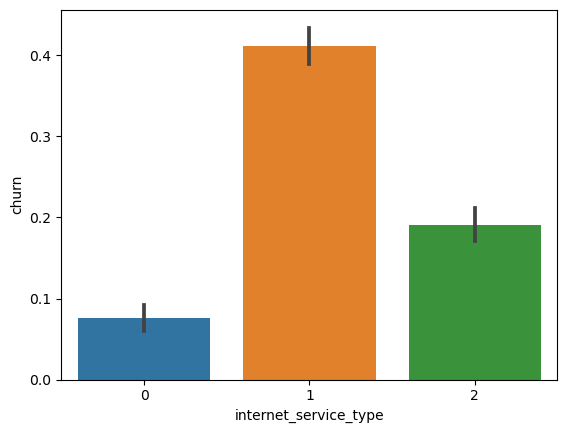

In [28]:
# 0 = none, fiber optic = 1, dls = 2
sns.barplot(data=train, y='churn', x='internet_service_type');

this is show us that people with people with fiber optic are more likey to turn than not having internet service

 does having fiber optic make a diffent comare to not having it 
 
 
Alpha = .05

h0: there is no relationship between churn and internet service type

ha: there is a relationship between churn and internet service  


In [9]:
observed = pd.crosstab(train.churn,train.internet_service_type)
observed

internet_service_type,0,1,2
churn,,,
0,848,1116,1140
1,70,782,269


In [12]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [13]:
p

1.8061078882405112e-91

My p-value is less than alpha, therefore, we reject the null hypothesis.
we can conclude that there is a relationship between churn and interent service type.

## What month are customers most likely to churn and does that depend on their contract type?

<Axes: xlabel='tenure', ylabel='churn'>

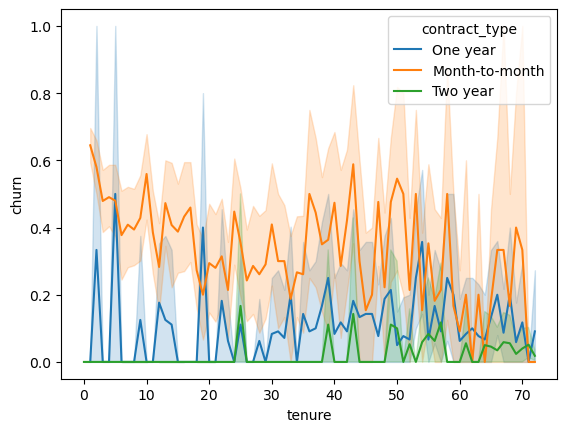

In [14]:
sns.lineplot(data=train,y='churn', x='tenure',hue='contract_type')

this is showing us the there is a relationship between churn and the type of contract they have. 

with month to month has a higher churn than the rest of the contract type

## Is there a service that is associated with more churn than expected?

<Axes: xlabel='phone_service', ylabel='churn'>

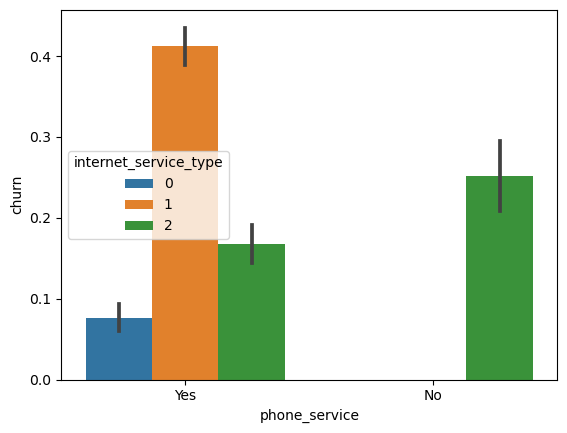

In [22]:
sns.barplot(data=train, y='churn',x='phone_service',hue='internet_service_type')

Yes by looking at this graph we can see that when they have fiber opitc with phone service they have a more likely chance to churn.

## Do customers who churn have a higher average monthly spend than those who don't?


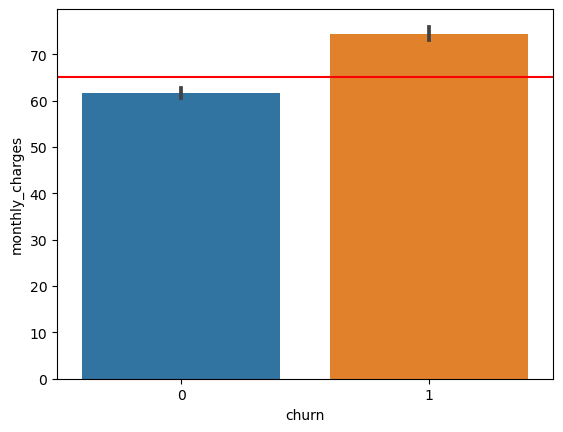

In [23]:
sns.barplot(data=train, x='churn',y='monthly_charges',)

mean=train.monthly_charges.mean()
plt.axhline(y=mean, color='red')

from the dataset we can see the higher the monthly bill is the more like they are the churn compare the those who monthly bill are lower

## Modeling

## Conclusion 

- from the data i grather without doing the modeling we can see that having fiber will have a higher chance to churn and with doing a stats test to prove it confim my prediction.

- people who has the phone service and fiber will more likey churn.

- people who are only paying month to month will mostly like churn more than people paying for a year or two years

- people who pay more than the average monthly bill will mostly likey churn.

## Next step 

- I would like to run more stats test if i had the time too 
- I would also like to find all the right model for the test i ran today